In [2]:
#importing required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#importing dataset and printing the extracted data
img_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5,1),
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    validation_split=0.3,
    channel_shift_range=0.2
)

In [22]:
path="./caltech-101-img"
img_generator_flow_train=img_generator.flow_from_directory(
    subset="training",
    batch_size=32,
    target_size=(224,224),
    directory=path,
    shuffle=True
)

img_generator_flow_valid=img_generator.flow_from_directory(
    subset="validation",
    batch_size=32,
    target_size=(224,224),
    directory=path,
    shuffle=True
)

FileNotFoundError: ignored

In [9]:
base_model=tf.keras.applications.InceptionV3(
    weights="imagenet",
    input_shape=(224,224,3),
    include_top=False
)

87910968/87910968 [==============================] - 4s 0us/step


In [21]:
imgs,labels=next(iter(img_generator_flow_train))
for img,lab in zip(imgs,labels):
  plt.imshow(img)
  plt.show()

NameError: ignored

In [10]:
base_model.trainable=False

In [15]:
model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102,activation="softmax")

])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 2, 2, 2048)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 102)               835686    
                                                                 
Total params: 22638470 (86.36 MB)
Trainable params: 835686 (3.19 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [19]:
model.compile( optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()]
              )
# model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=50)


In [20]:
model.fit(img_generator_flow_train,validation_data=img_generator_flow_valid,epochs=50)

NameError: ignored

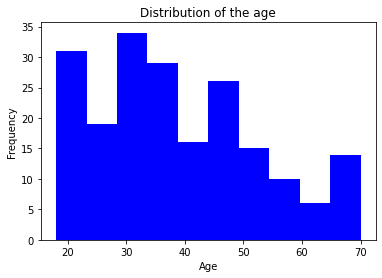

In [ ]:
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()